In [52]:
import pandas as pd 
import numpy as np

In [53]:
df=pd.read_csv("data/placement.txt")
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [54]:
# data Preprossec
df= df.iloc[:,1:]

df

# Step of ML:

* 1) Preprocess + EDA + Feature Selection.
* 2) Extract input and output Clos
*3) scale the value
- 4) train and test
- 5) train the model
- 6) Evaluate the model / model selection
- 7) deploy the model 

In [55]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [56]:
import matplotlib.pyplot as plt

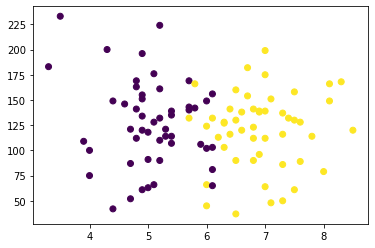

In [76]:
#EDA
plt.scatter(df["cgpa"],df["iq"],c=df["placement"])

In [74]:
# Extract input and output Clos
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [75]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [83]:
#4) train and test:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [84]:
y_test

58    1
78    0
29    1
96    0
53    1
70    1
94    0
43    1
91    1
57    1
Name: placement, dtype: int64

In [85]:
X_test

,cgpa,iq
58,8.0,79.0
78,6.1,81.0
29,7.0,112.0
96,4.4,42.0
53,8.3,168.0
70,6.3,127.0
94,4.7,52.0
43,6.8,141.0
91,7.5,158.0
57,6.5,130.0


In [86]:
#3) scale the value:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [87]:
X_train

array([[-0.83451404, -0.18354292],
       [-0.92446166,  1.80483875],
       [ 0.15490979,  0.17334609],
       [ 0.78454314, -0.05608256],
       [ 0.42475265, -0.23452707],
       [ 0.78454314, -0.89732096],
       [-0.20488069,  0.17334609],
       [ 0.33480503,  0.0713778 ],
       [-0.56467117, -0.28551121],
       [ 0.51470027, -0.89732096],
       [ 0.06496217, -0.59141609],
       [-0.02498545, -0.4894478 ],
       [-2.18372835,  2.74804544],
       [ 1.23428124, -0.23452707],
       [-0.11493307,  1.04007657],
       [-1.1043569 , -0.10706671],
       [-0.20488069,  0.37728268],
       [-2.36362359,  1.4734418 ],
       [ 0.96443838,  1.88131496],
       [-1.73399024, -1.27970205],
       [ 0.69459552,  1.44794973],
       [-1.82393787, -0.41297158],
       [ 1.41417648,  0.12236195],
       [ 0.15490979,  0.78515584],
       [ 0.15490979, -0.56592401],
       [ 1.23428124, -0.99928925],
       [-1.46414738,  1.90680704],
       [ 1.95386221,  1.04007657],
       [-0.6546188 ,

In [88]:
X_test = scaler.fit_transform(X_test)

In [91]:
#5) train the model
from sklearn.linear_model import LogisticRegression



In [92]:
clf = LogisticRegression()

In [94]:
clf.fit(X_train,y_train)

LogisticRegression()

In [97]:
#Evaluate the model / model selection:

y_pred = clf.predict(X_test)


In [98]:
y_test

58    1
78    0
29    1
96    0
53    1
70    1
94    0
43    1
91    1
57    1
Name: placement, dtype: int64

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(y_test,y_pred)

0.8

In [101]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

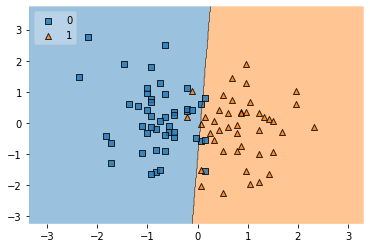

In [104]:
plot_decision_regions(X_train, y_train.values,clf=clf, legend=2)

In [105]:
import pickle

In [106]:
pickle.dump(clf,open('model.pk1',"wb"))